In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

#?? what is the func and inspect for
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)

In [7]:
# dir(inspector)

In [8]:
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [9]:
# help(inspector.get_columns)

In [10]:
for table in tables:
    print("\n")
    print('-' * 12)
    print(f"table '{table}' has the following columns:")
    print('-' * 12)
    for column in inspector.get_columns(table):
        print(f"name: {column['name']}   column type: {column['type']}, nullable:{column['nullable']}")
        



------------
table 'measurement' has the following columns:
------------
name: id   column type: INTEGER, nullable:False
name: station   column type: TEXT, nullable:True
name: date   column type: TEXT, nullable:True
name: prcp   column type: FLOAT, nullable:True
name: tobs   column type: FLOAT, nullable:True


------------
table 'station' has the following columns:
------------
name: id   column type: INTEGER, nullable:False
name: station   column type: TEXT, nullable:True
name: name   column type: TEXT, nullable:True
name: latitude   column type: FLOAT, nullable:True
name: longitude   column type: FLOAT, nullable:True
name: elevation   column type: FLOAT, nullable:True


In [11]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [12]:
#--Get table names out
Base.classes.keys()

['measurement', 'station']

In [13]:
#--Create classes
Measurement = Base.classes['measurement']
Station = Base.classes['station']

In [14]:
# dir(Measurement)
# dir(Station)

In [15]:
session = Session(engine)

In [16]:
# help(Measurement)

results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > '2016-08-01')

In [17]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


Functions to use with NaN : - 
.isna() : check for NaN, 
.fillna() : dosomthing with missisng value, 
.dropna() : drop null value

In [45]:
#--Loaded the query results into Pandas DataFrame
clean_prcp = pd.DataFrame(results)
# clean_prcp.set_index('date')
##?? If .drop() was not used it'll have two date columns
# clean_prcp = clean_prcp.drop(columns = 'date', axis = 1)
clean_prcp = clean_prcp.fillna(0)
clean_prcp = clean_prcp.set_index('date')


##--Sort dataframe by 'date'
# clean_prcp.sort_values(by='date', ascending = True)
clean_prcp

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,0.00
2017-08-21,0.56


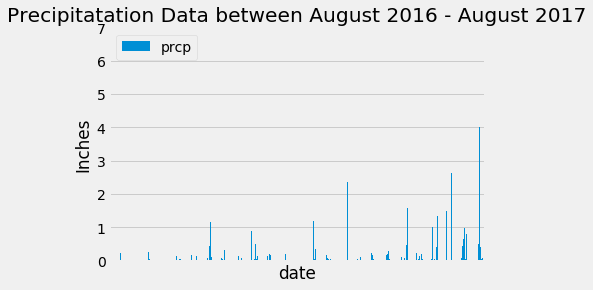

In [49]:
clean_prcp.plot(kind = 'bar')

plt.ylim(0, 7)

plt.xticks([])
plt.ylabel('Inches')
plt.title('Precipitatation Data between August 2016 - August 2017')

plt.show()

In [50]:
clean_prcp.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

In [53]:
stations_results = session.query(Station.id).count()
stations_results

9

In [57]:
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
                .order_by(func.count(Measurement.station).desc())
most_active.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# We can view all of the classes that automap found

In [23]:
# Save references to each table


In [24]:
# Create our session (link) from Python to the DB


In [25]:
session.close()

# Exploratory Climate Analysis

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [28]:
# Design a query to show how many stations are available in this dataset?


In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [38]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [39]:
# Plot the daily normals as an area plot with `stacked=False`
